<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [12]:
X_train.shape

(60000, 28, 28)

In [24]:
y_train.shape

(60000,)

In [14]:
y_train[0]

5

In [15]:
m1,h1,w1 = X_train.shape
X_train = X_train.reshape(m1,h1,w1,1)

m2,h2,w2 = X_test.shape
X_test = X_test.reshape(m2,h2,w2,1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_train = X_train/255
X_test = X_test/255

(-0.5, 27.5, 27.5, -0.5)

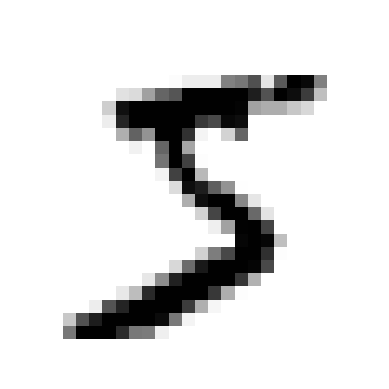

In [18]:
plt.imshow(X_train[0],cmap = 'binary')
plt.axis('off')

#LeNet Architecture

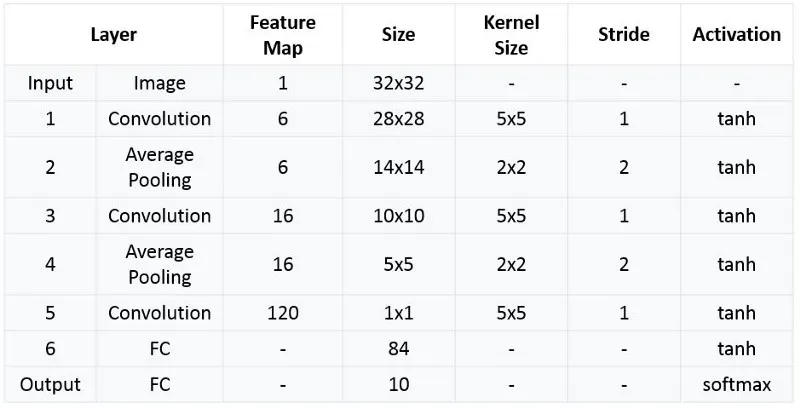

In [19]:
input_shape = (28,28,1)

In [25]:
def LeNet(input_shape):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=6,kernel_size = (5,5),strides = (1,1), activation='tanh'))
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5),strides = (1,1), activation='tanh'))
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides=(2,2)))
  # model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (1,1),strides = (1,1),activation = 'tanh'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))
  model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
      metrics = ['accuracy']
  )
  return model

In [32]:
model = LeNet(input_shape)
epochs = 10
history = model.fit((X_train,y_train), epochs = epochs,
                    validation_data= [X_test,y_test])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.2867 - loss: 2.1763 - val_accuracy: 0.6792 - val_loss: 1.4100
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7267 - loss: 1.2134 - val_accuracy: 0.8329 - val_loss: 0.7687
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8328 - loss: 0.7318 - val_accuracy: 0.8633 - val_loss: 0.5723
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8581 - loss: 0.5717 - val_accuracy: 0.8775 - val_loss: 0.4861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8714 - loss: 0.4941 - val_accuracy: 0.8872 - val_loss: 0.4362
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8807 - loss: 0.4505 - val_accuracy: 0.8920 - val_loss: 0.4029
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8835 - loss: 0.4165 - val_accuracy: 0.8977 - val_loss: 0.3778
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8900 -

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8893 - loss: 0.3730


[0.3357195258140564, 0.9050999879837036]

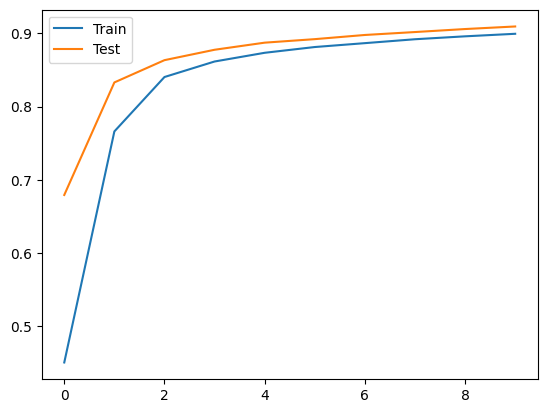

In [34]:
plt.plot(history.history['accuracy'],label = 'Train')
plt.plot(history.history['val_accuracy'],label = 'Test')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


7

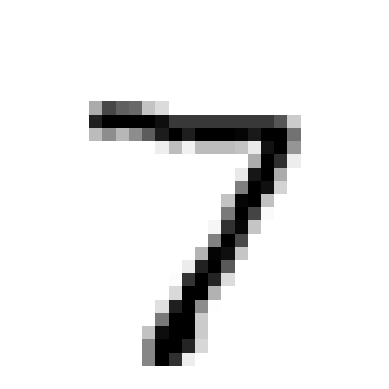

In [41]:
plt.imshow(X_test[0],cmap = 'binary')
plt.axis('off');

pred = model.predict(X_test[0].reshape(1,28,28,1))
np.argmax(pred)